

Removing null values, removing duplicate rows (if present), handling categorical variables, feature scaling, and removing 1-2 variables using correlation as feature selection -  these issues are present in the data.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

wine = pd.read_csv("/content/drive/MyDrive/Wine Quality.csv",delimiter = ",")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wine.shape

(6497, 13)

Removing null values





In [4]:
wine.isnull().sum()


,0
type,0
fixed acidity,18
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [5]:
 wine.dropna(inplace=True)


In [6]:
wine.isnull().sum()


,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


**Removing** duplicate rows (if present)

In [7]:
wine.duplicated().sum()


1168

In [8]:

wine.drop_duplicates(inplace=True)


In [9]:

wine.duplicated().sum()


0

Handling categorical variables




In [10]:
wine = pd.get_dummies(wine, columns=['type'])



In [11]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False,True
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False,True
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False,True
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,False,True


feature scaling

In [24]:
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,False


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = wine.drop('quality', axis=1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
scaler = StandardScaler()
scaled_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                  'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                  'pH', 'sulphates', 'alcohol']
wine[scaled_columns] = scaler.fit_transform(wine[scaled_columns])

In [34]:
wine.head()


,volatile acidity,chlorides,density,alcohol,quality,type_red
0,-0.439858,-0.317398,2.177383,-1.474770,6,False
1,-0.261543,-0.209049,-0.181499,-0.884704,6,False
2,-0.380420,-0.181961,0.189183,-0.378932,6,False
3,-0.677612,0.034736,0.357674,-0.547523,6,False
6,-0.142666,-0.317398,0.121786,-0.800408,6,False


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [38]:
X_train_scaled = scaler.transform(X_train)


In [39]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 fixed acidity               3.8
volatile acidity           0.08
citric acid                 0.0
residual sugar              0.6
chlorides                 0.009
free sulfur dioxide         1.0
total sulfur dioxide        6.0
density                 0.98711
pH                         2.72
sulphates                  0.22
alcohol                     8.0
type_red                  False
dtype: object
per-feature maximum before scaling:
 fixed acidity              15.9
volatile acidity           1.58
citric acid                1.66
residual sugar             65.8
chlorides                  0.61
free sulfur dioxide       289.0
total sulfur dioxide      440.0
density                 1.03898
pH                         4.01
sulphates                   2.0
alcohol                    14.9
type_red                   True
dtype: object


In [40]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


removing 1-2 variables using correlation as feature selection

In [36]:

correlation_matrix = wine.corr()

quality_corr = correlation_matrix['quality'].sort_values(ascending=False)

quality_corr


,quality
quality,1.000000
alcohol,0.469298
type_red,-0.114268
chlorides,-0.201665
volatile acidity,-0.266004
density,-0.323964


In [33]:
threshold = 0.1
drop_features = quality_corr[abs(quality_corr) < threshold].index
wine = wine.drop(drop_features, axis=1)

In [18]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,False


<Axes: >

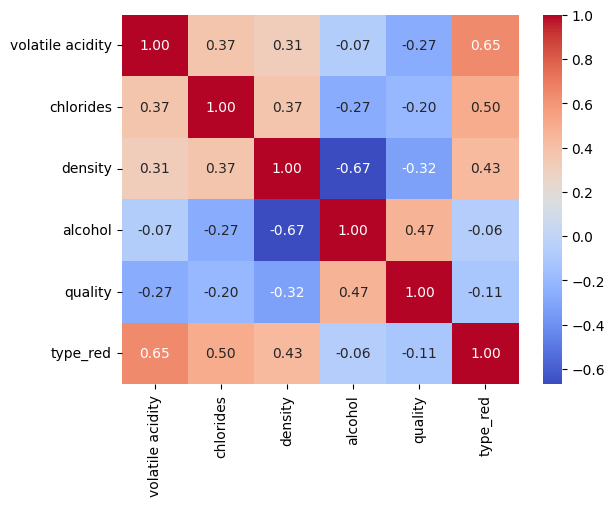

In [46]:
import seaborn as sns

correlation_matrix = wine.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
